In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from pylab import mpl
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [2]:
tickers = yf.Tickers('GOOGL SPX')
tickers.tickers['GOOGL'].info
tickers.tickers['GOOGL'].history(period="1mo")
tickers.tickers['GOOGL'].actions

,Dividends,Stock Splits
Date,,


In [3]:
data = yf.download("SPY", start="2023-01-01", end="2023-04-01")

[*********************100%***********************]  1 of 1 completed


In [14]:
data = data.drop(columns=['Volume'])
data

,Open,High,Low,Close,Adj Close
Date,,,,,
2023-01-03,384.369995,386.429993,377.829987,380.820007,379.372131
2023-01-04,383.179993,385.880005,380.000000,383.760010,382.300964
2023-01-05,381.720001,381.839996,378.760010,379.380005,377.937592
2023-01-06,382.609985,389.250000,379.410004,388.079987,386.604492
2023-01-09,390.369995,393.700012,387.670013,387.859985,386.385345
...,...,...,...,...,...
2023-03-27,398.119995,398.920013,395.559998,396.489990,396.489990
2023-03-28,395.769989,396.489990,393.690002,395.600006,395.600006
2023-03-29,399.929993,401.600006,398.679993,401.350006,401.350006


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

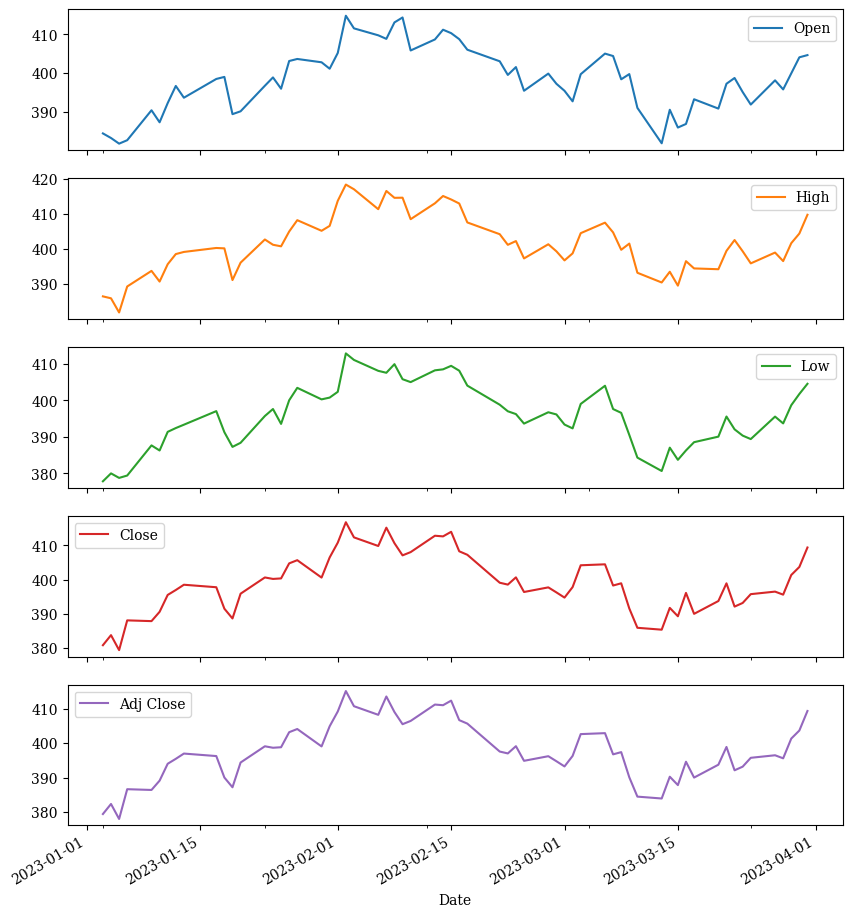

In [15]:
 data.plot(figsize=(10, 12), subplots=True)

In [16]:
data.describe().round(2)

,Open,High,Low,Close,Adj Close
count,62.00,62.00,62.00,62.00,62.00
mean,398.35,401.49,395.78,398.98,397.73
std,8.46,8.39,8.76,8.75,8.68
min,381.72,381.84,377.83,379.38,377.94
25%,392.34,396.15,390.14,393.31,393.19
50%,398.61,400.92,395.93,398.38,396.87
75%,404.34,407.22,402.20,405.45,404.03
max,414.86,418.31,412.88,416.78,415.20


In [17]:
data.diff().mean()

Open         0.332623
High         0.381476
Low          0.438033
Close        0.468361
Adj Close    0.492096
dtype: float64

In [18]:
data.pct_change().round(3).head()

,Open,High,Low,Close,Adj Close
Date,,,,,
2023-01-03,NaN,NaN,NaN,NaN,NaN
2023-01-04,-0.003,-0.001,0.006,0.008,0.008
2023-01-05,-0.004,-0.010,-0.003,-0.011,-0.011
2023-01-06,0.002,0.019,0.002,0.023,0.023
2023-01-09,0.020,0.011,0.022,-0.001,-0.001


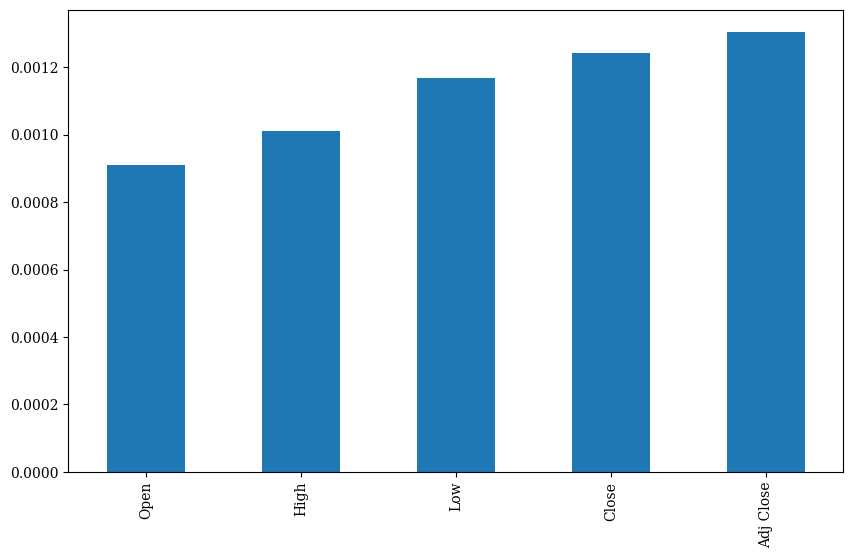

In [19]:
data.pct_change().mean().plot(kind='bar', figsize=(10, 6));

In [21]:
rets = np.log(data / data.shift(1))
rets.head().round(3)

,Open,High,Low,Close,Adj Close
Date,,,,,
2023-01-03,NaN,NaN,NaN,NaN,NaN
2023-01-04,-0.003,-0.001,0.006,0.008,0.008
2023-01-05,-0.004,-0.011,-0.003,-0.011,-0.011
2023-01-06,0.002,0.019,0.002,0.023,0.023
2023-01-09,0.020,0.011,0.022,-0.001,-0.001


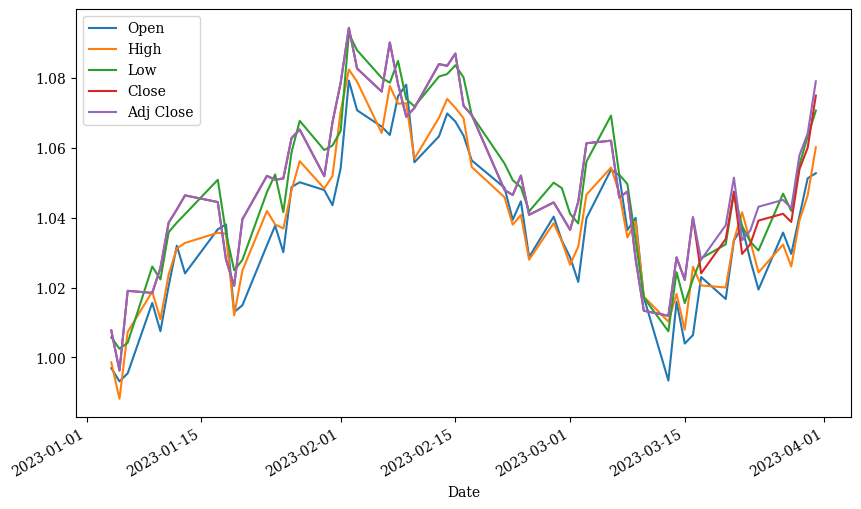

In [22]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));

In [57]:
goog = tickers.tickers['GOOGL'].history(period="10y")
goog.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2013-04-08 00:00:00-04:00,19.488237,19.508259,19.229229,19.390640,113170716,0.0,0.0
2013-04-09 00:00:00-04:00,19.406906,19.613363,19.347097,19.460711,86205708,0.0,0.0
2013-04-10 00:00:00-04:00,19.592592,19.828579,19.419418,19.774275,79064856,0.0,0.0
2013-04-11 00:00:00-04:00,19.841843,19.847347,19.621120,19.779530,81066852,0.0,0.0
2013-04-12 00:00:00-04:00,19.819571,19.822323,19.592842,19.771021,65402532,0.0,0.0


In [58]:
window = 100
goog['min'] = goog['Open'].rolling(window=window).min()
goog['mean'] = goog['Open'].rolling(window=window).mean()
goog['max'] = goog['Open'].rolling(window=window).max()
goog

,Open,High,Low,Close,Volume,Dividends,Stock Splits,min,mean,max
Date,,,,,,,,,,
2013-04-08 00:00:00-04:00,19.488237,19.508259,19.229229,19.390640,113170716,0.0,0.0,NaN,NaN,NaN
2013-04-09 00:00:00-04:00,19.406906,19.613363,19.347097,19.460711,86205708,0.0,0.0,NaN,NaN,NaN
2013-04-10 00:00:00-04:00,19.592592,19.828579,19.419418,19.774275,79064856,0.0,0.0,NaN,NaN,NaN
2013-04-11 00:00:00-04:00,19.841843,19.847347,19.621120,19.779530,81066852,0.0,0.0,NaN,NaN,NaN
2013-04-12 00:00:00-04:00,19.819571,19.822323,19.592842,19.771021,65402532,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-03-31 00:00:00-04:00,101.300003,103.889999,101.040001,103.730003,36823200,0.0,0.0,85.980003,94.8129,105.800003
2023-04-03 00:00:00-04:00,102.389999,104.529999,101.930000,104.360001,25035400,0.0,0.0,85.980003,94.9640,105.800003
2023-04-04 00:00:00-04:00,104.330002,105.580002,104.040001,104.720001,24420100,0.0,0.0,85.980003,95.1183,105.800003


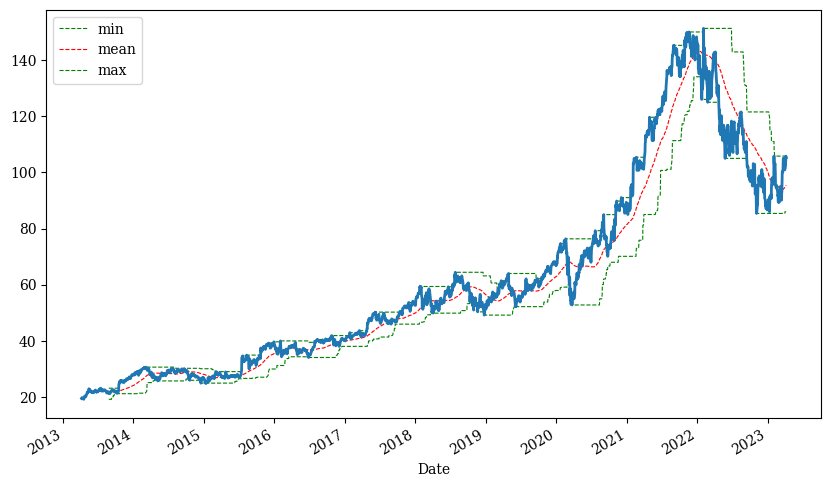

In [59]:
ax = goog[['min', 'mean', 'max']].iloc[-4000:].plot(
figsize=(10, 6), style=['g--', 'r--', 'g--'], lw=0.8)
goog['Open'].iloc[-4000:].plot(ax=ax, lw=2.0);